# Customer Segmentation Analysis

# InternSavy Internship

## Task=1

In [1]:
#importing libraries
#importing numerial python
import numpy as np
#importing pandas
import pandas as pd
#importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#importing warnings
from warnings import filterwarnings
filterwarnings('ignore')
# Importing train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#loading dataset using pandas
df=pd.read_csv('Mall_Customers.csv')

In [3]:
# first five rows of dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# rows and columns detection
df.shape

(200, 5)

In [5]:
#Retriving kind of datatypes of all columns in dataset
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
#Retriving null values in all columns of dataset
df.isnull().sum()
#we can infer that their is no null values in this dataset

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Descriptive and statistical analysis of numerical data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#Retriving information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Numerical columns of dataframe
num_columns=df.select_dtypes(include=(np.number))
num_columns

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [10]:
for i in (num_columns.columns):
    print(df[i].skew())


0.0
0.48556885096681657
0.3218425498619055
-0.047220201374263374


# Outliers Treatment

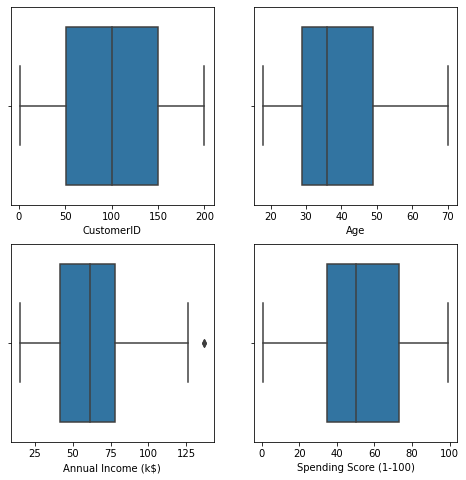

In [11]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,8))
for i,j in zip(num_columns.columns,ax.flatten()):
    sns.boxplot(df[i],ax=j)
plt.show()

In [12]:
# from above box plots we can see that Annual Income columnhas outliers

In [13]:
# calculate Q1
Q1=df['Annual Income (k$)'].quantile(0.25)
# calculate Q3
Q3=df['Annual Income (k$)'].quantile(0.75)
# calculate IQR
Iqr=Q3-Q1
#Setting upper limit
ul=Q3+(1.5*Iqr)
ll=Q1-(1.5*Iqr)
ul

132.75

In [14]:
# treatment of outliers in annual income column
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>ul,ul,df['Annual Income (k$)'])

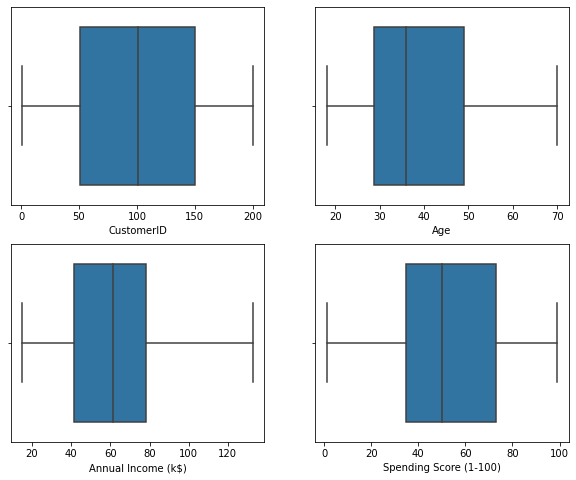

In [15]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
for i,j in zip(num_columns.columns,ax.flatten()):
    sns.boxplot(df[i],ax=j)
plt.show()

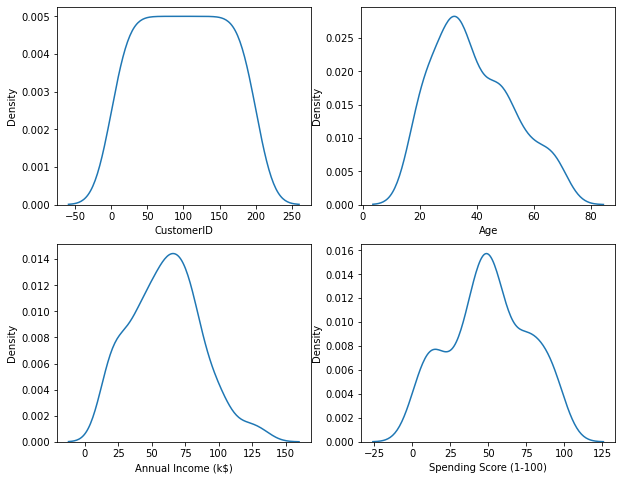

In [16]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
for i,j in zip(num_columns.columns,ax.flatten()):
    sns.distplot(df[i],ax=j,hist=False)
plt.show()

As CustomerId does not convey any information so we are droping this column

# Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

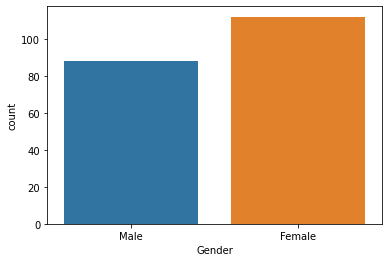

In [17]:
sns.countplot(df['Gender'])

In [18]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

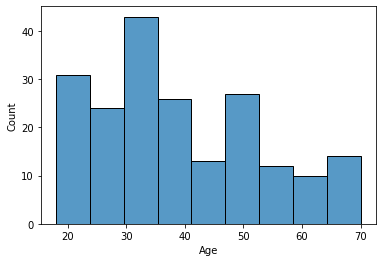

In [19]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

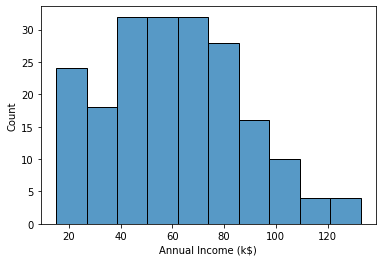

In [20]:
sns.histplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

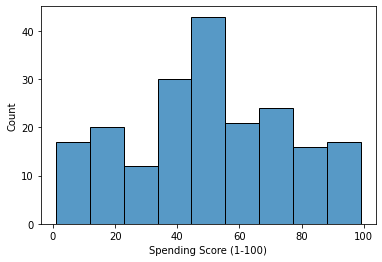

In [21]:
sns.histplot(df['Spending Score (1-100)'])

In [22]:
X=df.drop(columns=['CustomerID','Gender'])

In [23]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15.00,39
1,21,15.00,81
2,20,16.00,6
3,23,16.00,77
4,31,17.00,40
...,...,...,...
195,35,120.00,79
196,45,126.00,28
197,32,126.00,74
198,32,132.75,18


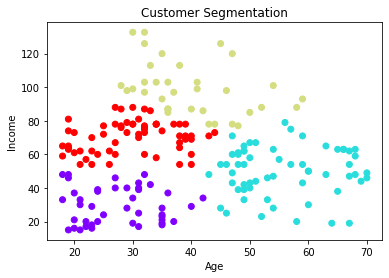

Segment 1 Centroid: Age=27.51, Annual Income (k$)=29.70
Segment 2 Centroid: Age=55.72, Annual Income (k$)=49.92
Segment 3 Centroid: Age=39.83, Annual Income (k$)=98.93
Segment 4 Centroid: Age=29.84, Annual Income (k$)=70.47


In [24]:

from sklearn.cluster import KMeans


# Select relevant features for segmentation
features = ['Age', 'Annual Income (k$)']

# Prepare the feature matrix
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (segments)
num_clusters = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Segment'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation')
plt.show()

# Print the centroids of each cluster (inverse-transformed for interpretation)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    print(f"Segment {i+1} Centroid: Age={centroid[0]:.2f}, Annual Income (k$)={centroid[1]:.2f}")


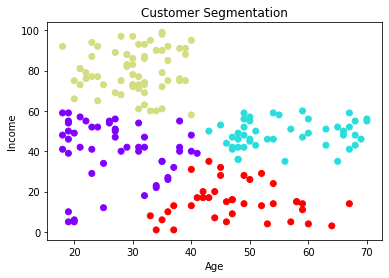

Segment 1 Centroid: Age=27.22, Spending Score (1-100)=40.04
Segment 2 Centroid: Age=55.98, Spending Score (1-100)=48.51
Segment 3 Centroid: Age=30.29, Spending Score (1-100)=79.82
Segment 4 Centroid: Age=47.61, Spending Score (1-100)=15.00


In [25]:

from sklearn.cluster import KMeans


# Select relevant features for segmentation
features = ['Age','Spending Score (1-100)']

# Prepare the feature matrix
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (segments)
num_clusters = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Segment'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation')
plt.show()

# Print the centroids of each cluster (inverse-transformed for interpretation)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    print(f"Segment {i+1} Centroid: Age={centroid[0]:.2f}, Spending Score (1-100)={centroid[1]:.2f}")
